In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,NaN,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	1
float64		column 3	3
float64		column 4	1


In [5]:
df.describe()

,column 1,column 2,column 3,column 4
count,149.000000,149.000000,147.000000,149.000000
mean,5.842282,3.054362,3.755782,1.196644
std,0.830758,0.435034,1.763757,0.765331
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

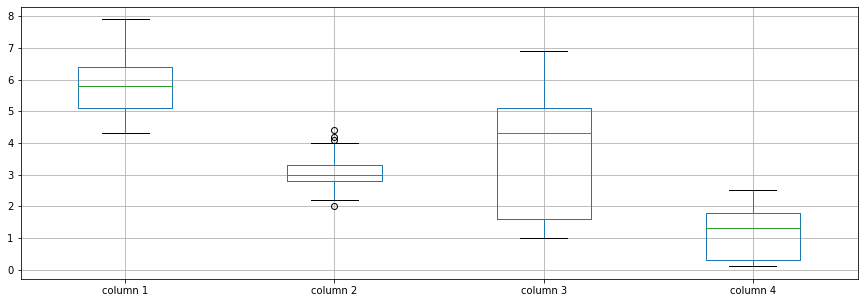

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1    5.842282
column 2    3.054362
column 3    3.755782
column 4    1.196644
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.108042,0.871771,0.818466
column 2,-0.108042,1.000000,-0.419530,-0.357889
column 3,0.871771,-0.419530,1.000000,0.962214
column 4,0.818466,-0.357889,0.962214,1.000000


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [4,4+9,4+9+9,4+9+9+9,4+9+9,4+9,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 14.341381496853298
Epoch: 1 , loss: 14.299924744500053
Epoch: 2 , loss: 14.323772748311361
Epoch: 3 , loss: 14.320101420084635
Epoch: 4 , loss: 14.343937661912706
Epoch: 5 , loss: 14.267312579684788
Epoch: 6 , loss: 14.305643611484104
Epoch: 7 , loss: 14.345843421088325
Epoch: 8 , loss: 14.400366041395399
Epoch: 9 , loss: 14.351315286424425
Epoch: 10 , loss: 14.255112753974068
Epoch: 11 , loss: 14.431246863471138
Epoch: 12 , loss: 14.279397116767036
Epoch: 13 , loss: 14.299869537353516
Epoch: 14 , loss: 14.295518345303005
Epoch: 15 , loss: 14.40482923719618
Epoch: 16 , loss: 14.284324963887533
Epoch: 17 , loss: 14.36245452033149
Epoch: 18 , loss: 14.331513086954752
Epoch: 19 , loss: 14.379494878980848
Epoch: 20 , loss: 14.25622632768419
Epoch: 21 , loss: 14.361670706007216
Epoch: 22 , loss: 14.200292693244087
Epoch: 23 , loss: 14.384089681837294
Epoch: 24 , loss: 14.355924394395617
Epoch: 25 , loss: 14.

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.1
column 2    3.7
column 3    1.5
column 4    0.4
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.0,0.0,-1.384082,0.0
1,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0
...,...,...,...,...
145,0.0,0.0,0.000000,0.0
146,0.0,0.0,0.000000,0.0
147,0.0,0.0,0.000000,0.0
148,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(10.090014725802948, 97.653468960401)

In [18]:
NRMS=numerator/denominator
NRMS


0.10332469325687245

In [19]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.1,3.5,0.015918,0.2
1,4.9,3.0,1.400000,0.2
2,4.7,3.2,1.300000,0.2
3,4.6,3.1,1.500000,0.2
4,5.0,3.6,1.400000,0.2
...,...,...,...,...
145,6.7,3.0,5.200000,2.3
146,6.3,2.5,5.000000,1.9
147,6.5,3.0,5.200000,2.0
148,6.2,3.4,5.400000,2.3


In [21]:
imputations[-1].to_excel("Iris_C_1(imp).xlsx", index=False, header=False)